#**Importing Necessary Libraries**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# For Options
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

# For Warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing
from sklearn.preprocessing import  StandardScaler , OneHotEncoder

# For Transformer.
from sklearn.compose import ColumnTransformer

# Train test splitting and hyperparameter tunning.
from sklearn.model_selection import train_test_split , GridSearchCV

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# For Dimensionality Reduction i,e PCA.
from sklearn.decomposition import PCA

# Pipelines.
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import classification_report

In [ ]:
# let's load data and understand data !
filepath = '/content/drive/MyDrive/files/Crop_recommendation.csv'
data_import = pd.read_csv(filepath)

data_import.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Drop Unwanted columns.
df = data_import
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<b>

1. There are no missing values ! <br>
2. All the columns are numerical ,except label <br>

### **Data Visualization.**

In [ ]:
data_viz_df = df.copy()
data_viz_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


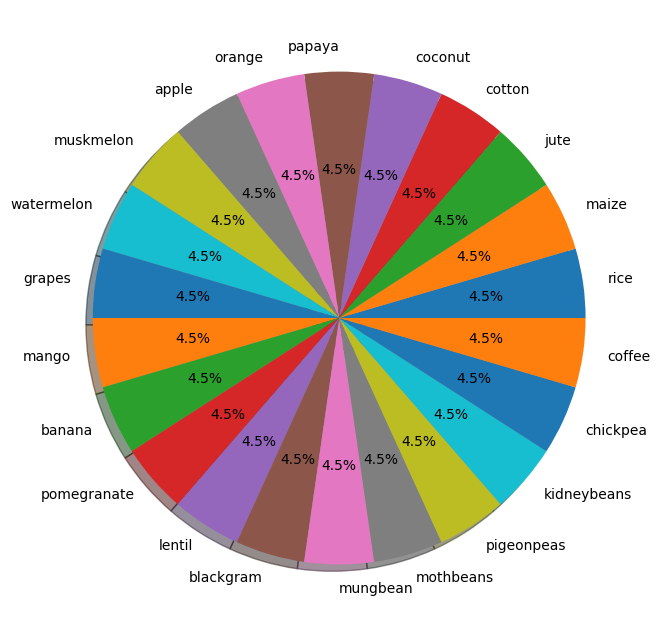

In [ ]:
label_name = data_viz_df['label'].value_counts().index
val = data_viz_df['label'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = label_name , shadow = True , autopct = '%1.1f%%')
plt.show()

<Axes: xlabel='label', ylabel='count'>

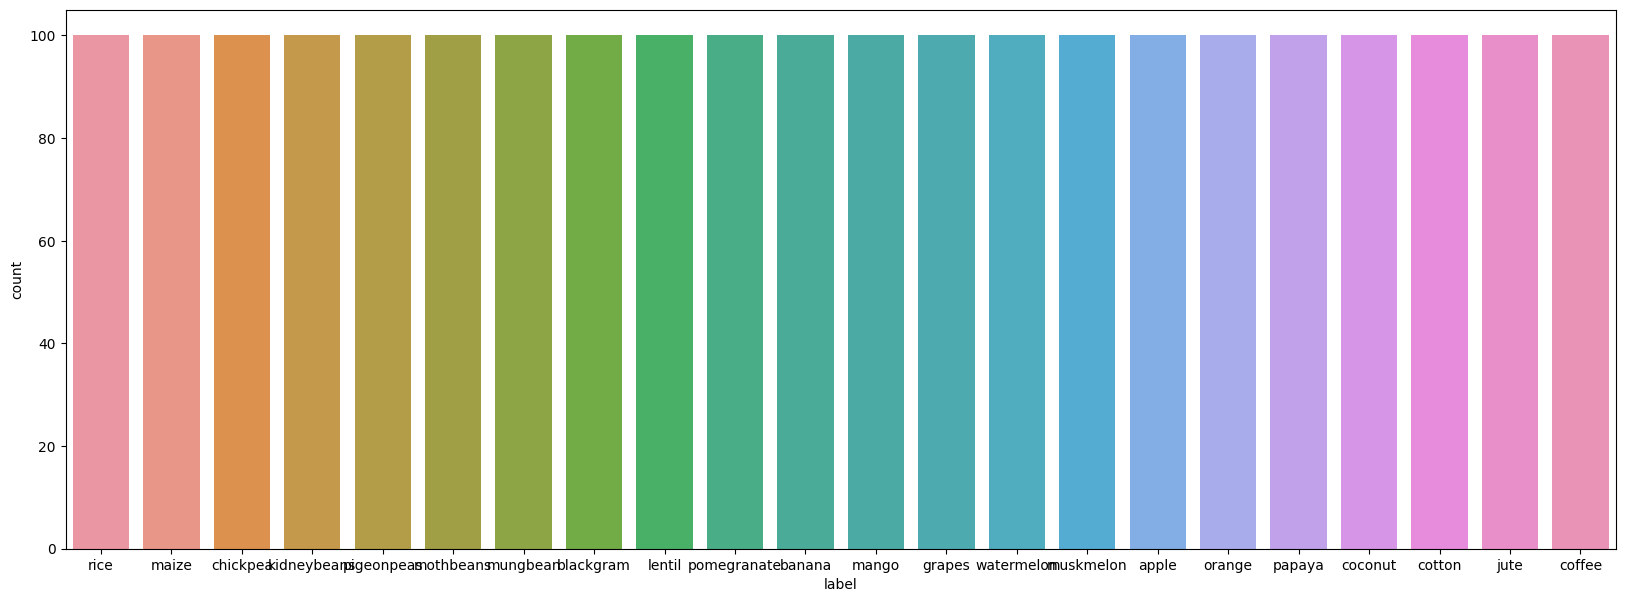

In [ ]:
# Pie chart for Label column.

plt.figure(figsize = (20 , 7))
sns.countplot(x = 'label' , data = data_viz_df)

##### Conclusion:  Count of all the values in label are same.

In [ ]:

def col_groupby(df , col , target) :
    max_label = df.groupby(target)[col].max().sort_values()[-1:].index[0]
    max_val = df.groupby(target)[col].max().sort_values()[-1:].values[0]

    min_label = df.groupby(target)[col].min().sort_values()[-1:].index[0]
    min_val = df.groupby(target)[col].min().sort_values()[-1:].values[0]

    return max_label , max_val , min_label , min_val

max_label , max_val , min_label , min_val = col_groupby(df , 'rainfall' , 'label')
print(f"Max Rainfall is required for {max_label} crop of {max_val} value.")
print(f"Min Rainfall is required for {min_label} crop of {min_val} value")

max_label , max_val , min_label , min_val = col_groupby(df , 'temperature' , 'label')
print(f"Max temperature is required for {max_label} crop of {max_val} value.")
print(f"Min temperature is required for {min_label} crop of {min_val} value")

max_label , max_val , min_label , min_val = col_groupby(df , 'ph' , 'label')
print(f"Max PH is required for {max_label} crop of {max_val} value.")
print(f"Min PH is required for {min_label} crop of {min_val} value")

max_label , max_val , min_label , min_val = col_groupby(df , 'humidity' , 'label')
print(f"Max humidity is required for {max_label} crop of {max_val} value.")
print(f"Min humidity is required for {min_label} crop of {min_val} value")


Max Rainfall is required for rice crop of 298.5601175 value.
Min Rainfall is required for rice crop of 182.5616319 value
Max temperature is required for papaya crop of 43.67549305 value.
Min temperature is required for muskmelon crop of 27.02415146 value
Max PH is required for mothbeans crop of 9.93509073 value.
Min PH is required for papaya crop of 6.501521192 value
Max humidity is required for coconut crop of 99.98187601 value.
Min humidity is required for papaya crop of 90.03863107 value


In [ ]:
data_viz_df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

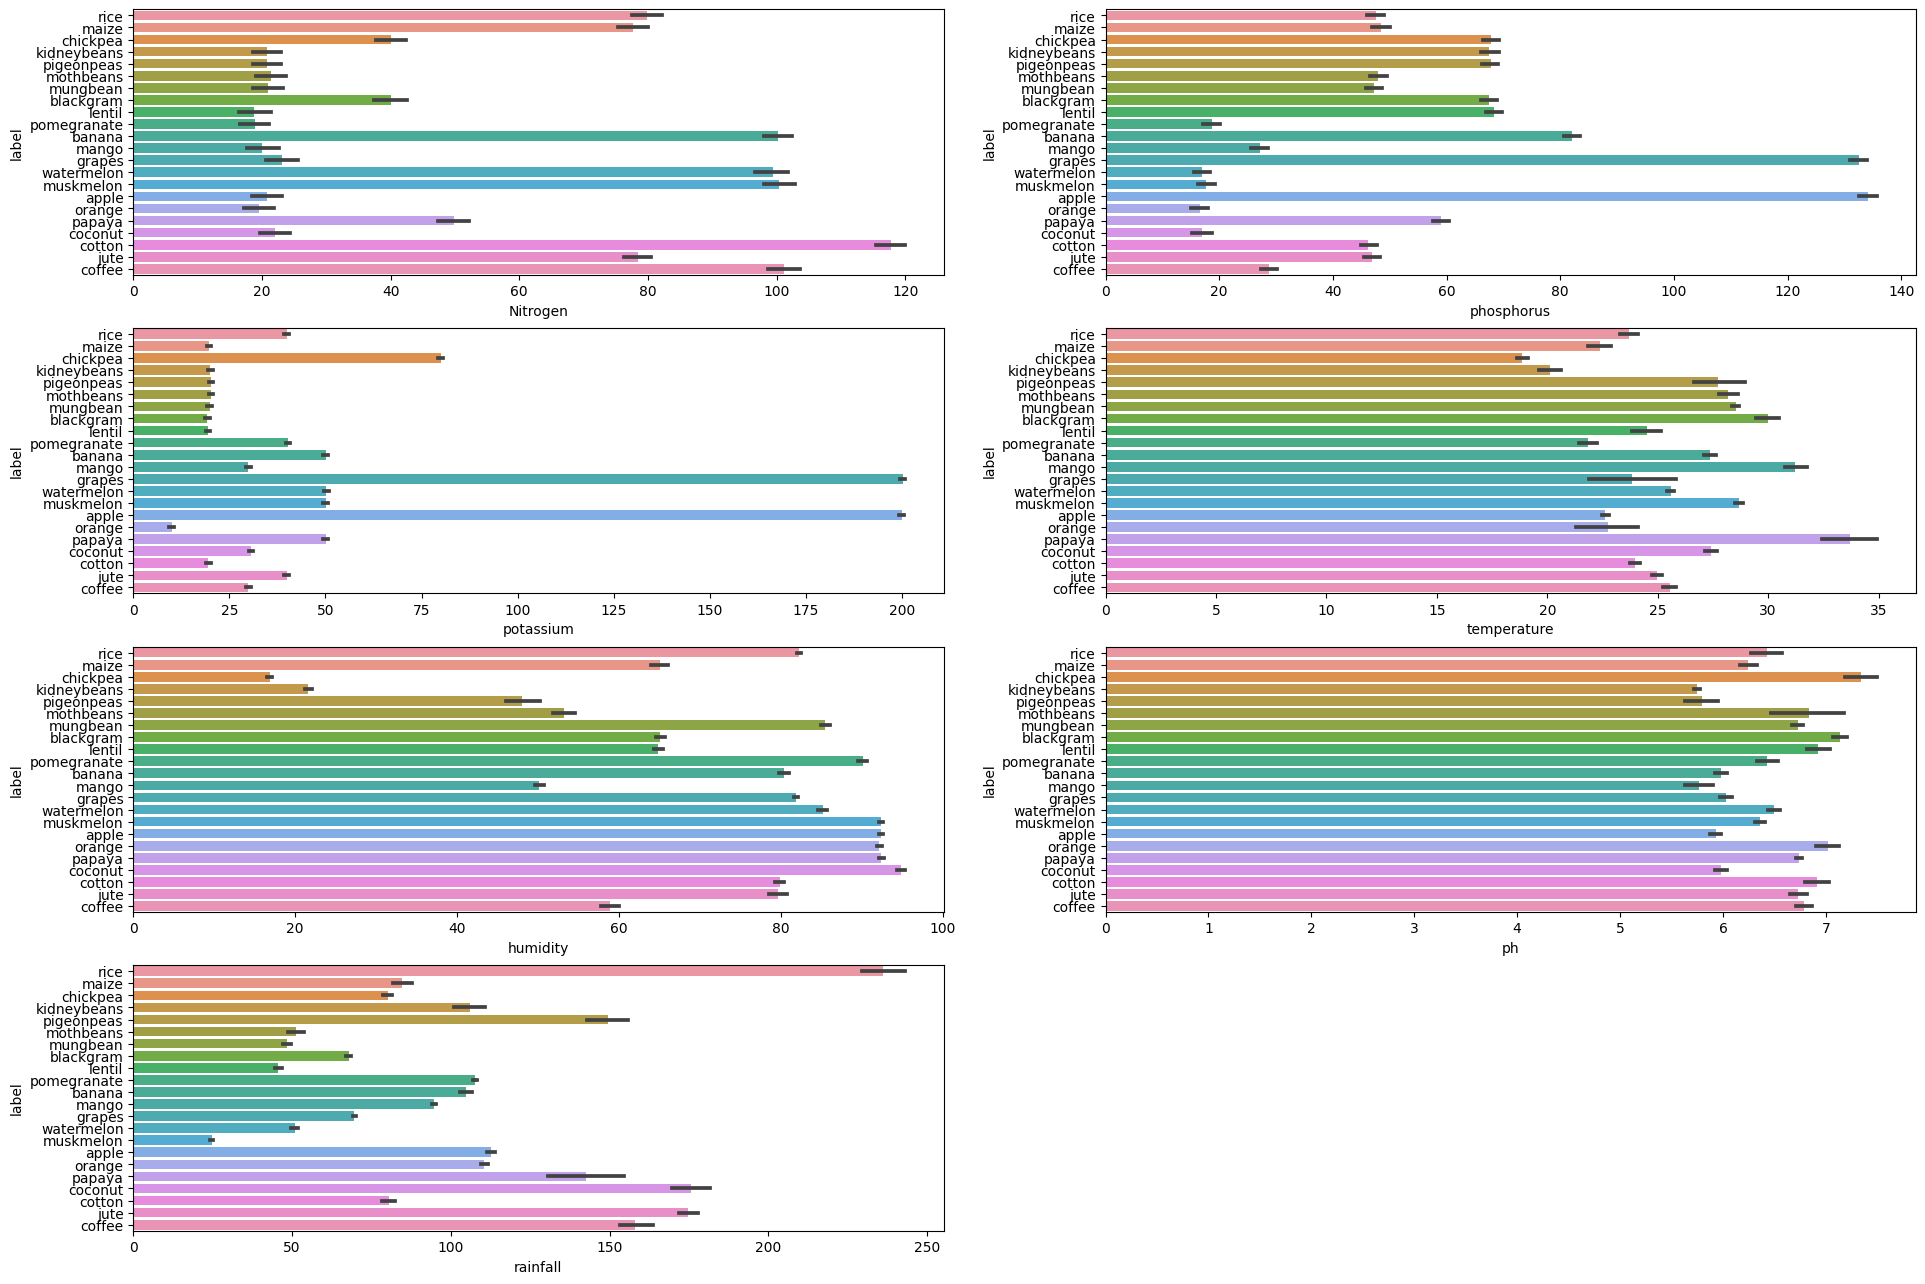

In [ ]:
# Barplots.

cols = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_barplots(df , cols) :

    i = 1
    plt.figure(figsize = (23,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.barplot(data = df , x = col_name , y = target)
        i += 1

create_barplots(df , cols)

<b>

1. Cotton requires more nitrogen compare to other label crop.
2. Apple requires more phosphorous compare to other label crop.
3. Grapes and Apple requires most potassium compare to other label crop.
4. Orange requires highest temperature compare to other label crop.
5. Coconut requires high humidity compare to other label crop.
6. Chickpea requires high ph compare to other label crop.
7. Rice requires most heavy rainfall compare to other label crop.
    
</b>

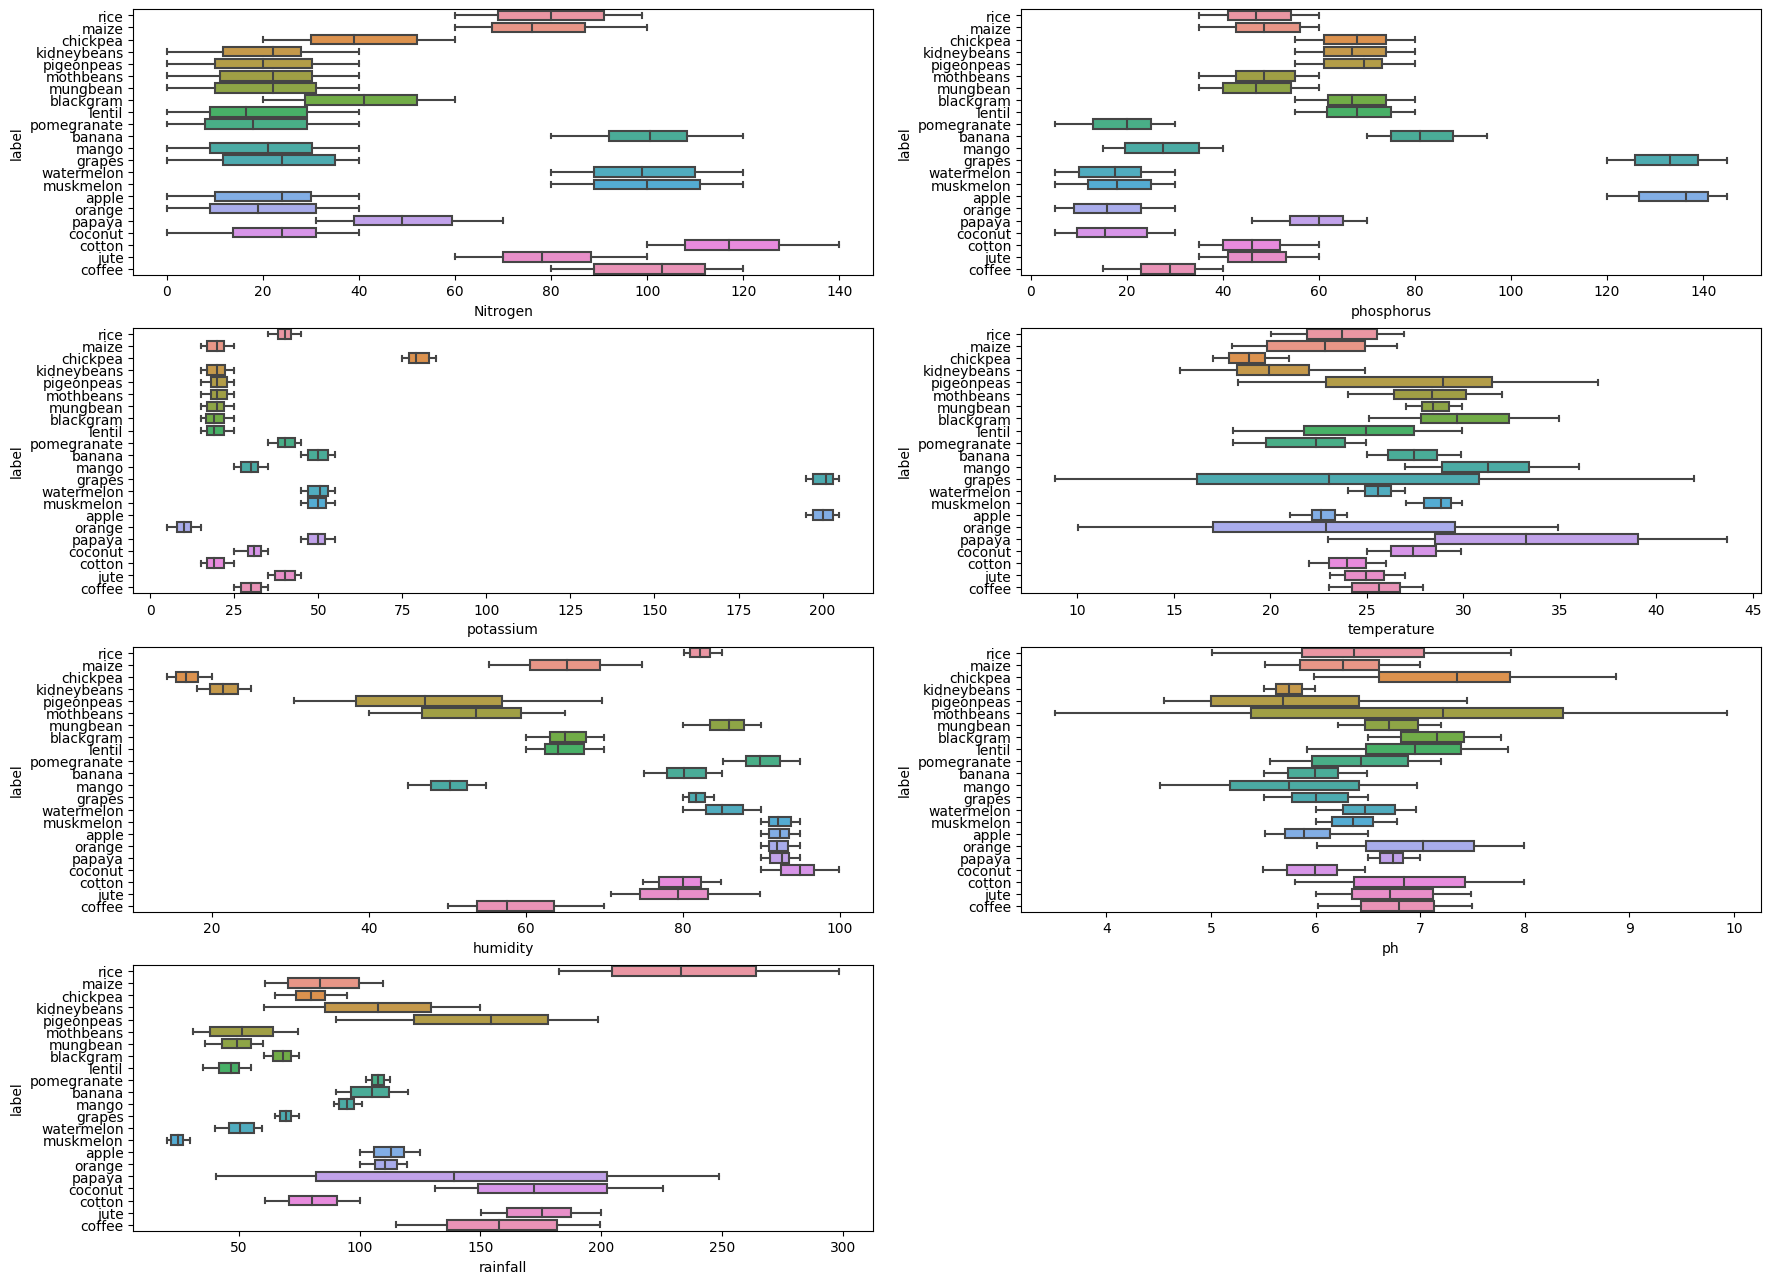

In [ ]:
# Box-plots .

cols = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_boxplots(df , cols) :

    i = 1
    plt.figure(figsize = (21,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.boxplot(data = df , x = col_name , y = target)
        i += 1

create_boxplots(df , cols)

#### Features and label split !

In [ ]:
features = df.drop('label' , axis = 1)
label = df['label']

#### Train test splitting.

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.2 , random_state = 42)

print(f"x train shape : {x_train.shape}\n y train shape : {y_train.shape} \n x test shape : {x_test.shape} \n y test shape : {y_test.shape}")

x train shape : (1760, 7)
 y train shape : (1760,) 
 x test shape : (440, 7) 
 y test shape : (440,)


#### Preprocessing and Model Building using pipelines.


In [ ]:
lr_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()),
    ('lr_model' , LogisticRegression())
])

rf_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) ,
    ('rf_model' , RandomForestClassifier())
])

gb_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) ,
    ('gb_model' , GradientBoostingClassifier())
])

ab_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) ,
    ('ab_model' , AdaBoostClassifier())
])

dt_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) ,
    ('dt_model' , DecisionTreeClassifier())
])

knn_pipe = Pipeline(steps = [
    ('scaler' , StandardScaler()) ,
    ('knn_model', KNeighborsClassifier())
])

In [ ]:
pipelines = [lr_pipe , rf_pipe , gb_pipe , ab_pipe , dt_pipe , knn_pipe]
model_names = ['Logistic Regression Classifier' , 'Random Forest Classifier' , 'Gradient Boosting Classifier','Adaboosting Classifier' , 'Decision Tree Clasifier' , 'KNearest Neighbors Classifier']


for pipe in pipelines :
    pipe.fit(x_train , y_train)

# Comparing accuracies
for index,val in enumerate(pipelines) :
        print(f"{pipelines[index]} , test score : {val.score(x_test,y_test)}")

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr_model', LogisticRegression())]) , test score : 0.9636363636363636
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf_model', RandomForestClassifier())]) , test score : 0.9931818181818182
Pipeline(steps=[('scaler', StandardScaler()),
                ('gb_model', GradientBoostingClassifier())]) , test score : 0.9818181818181818
Pipeline(steps=[('scaler', StandardScaler()),
                ('ab_model', AdaBoostClassifier())]) , test score : 0.1409090909090909
Pipeline(steps=[('scaler', StandardScaler()),
                ('dt_model', DecisionTreeClassifier())]) , test score : 0.9863636363636363
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_model', KNeighborsClassifier())]) , test score : 0.9568181818181818


In [ ]:
y_pred_rf = rf_pipe.predict(x_test)  # Making predictions .

#### Metrics Evaluation.

In [ ]:
print(f"Classification report : {classification_report(y_test , y_pred_rf)}")

Classification report :               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   